In [ ]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
plots.style.use('fivethirtyeight')
%matplotlib inline

## Defining a Classifier

#### Watch Demo Video Below

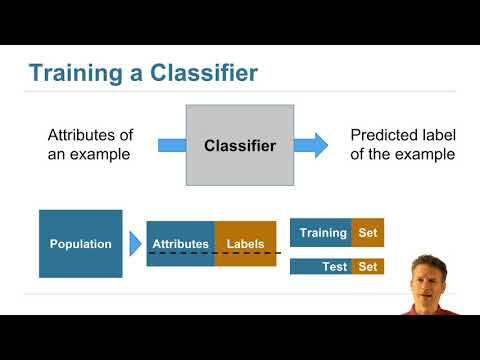

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('-7haErHby0U', width=800, height=300)

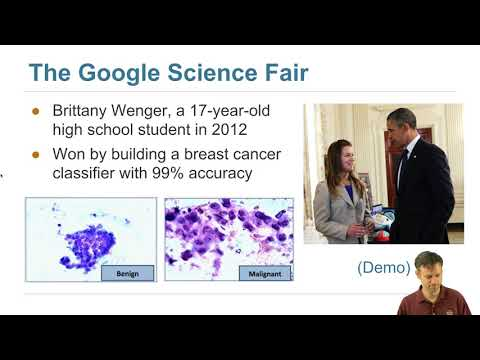

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo('fpBy5ckZFCA', width=800, height=300)

**Please run all cells before this cell, including the import cell at the top of the notebook.**

In [ ]:
patients = Table.read_table('breast-cancer.csv').drop('ID')
patients.show(5)

In [ ]:
patients.scatter('Bland Chromatin', 'Single Epithelial Cell Size', colors='Class')

In [ ]:
def randomize_column(a):
    return a + np.random.normal(0.0, 0.09, size=len(a))

jittered = Table().with_columns([
        'Bland Chromatin (jittered)', 
        randomize_column(patients.column('Bland Chromatin')),
        'Single Epithelial Cell Size (jittered)', 
        randomize_column(patients.column('Single Epithelial Cell Size')),
        'Class',
        patients.column('Class')
    ])

jittered.scatter('Bland Chromatin (jittered)', 'Single Epithelial Cell Size (jittered)', colors='Class')

## Distance

#### Watch Demo Video Below

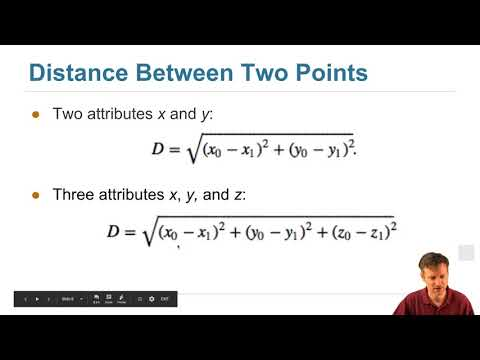

In [3]:
from IPython.display import YouTubeVideo

YouTubeVideo('R-08BgOxtsI', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
Table().with_columns(['X', [0, 2, 3], 'Y', [0, 2, 4]]).scatter('X', 'Y')

In [ ]:
def distance(pt1, pt2):
    """Return the distance between two points (represented as arrays)"""
    return np.sqrt(np.sum((pt1 - pt2) ** 2))

def row_distance(row1, row2):
    """Return the distance between two numerical rows of a table"""
    return distance(make_array(row1), make_array(row2))

In [ ]:
attributes = patients.drop('Class')
attributes.show(3)

In [ ]:
row_distance(attributes.row(0), attributes.row(1))

In [ ]:
row_distance(attributes.row(0), attributes.row(2))

In [ ]:
row_distance(attributes.row(0), attributes.row(0))

## Classification Procedure

#### Watch Demo Video Below

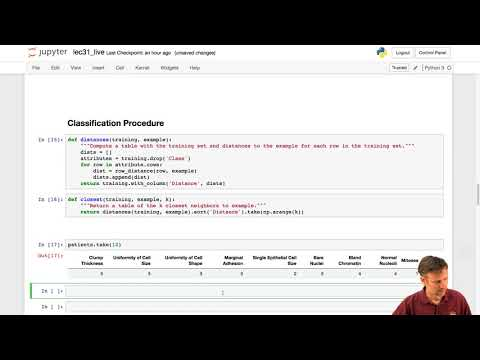

In [4]:
from IPython.display import YouTubeVideo

YouTubeVideo('l7m4stmyncA', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
def distances(training, example):
    """Compute a table with the training set and distances to the example for each row in the training set."""
    dists = []
    attributes = training.drop('Class')
    for row in attributes.rows:
        dist = row_distance(row, example)
        dists.append(dist)
    return training.with_column('Distance', dists)

In [ ]:
def closest(training, example, k):
    """Return a table of the k closest neighbors to example"""
    return distances(training, example).sort('Distance').take(np.arange(k))

In [ ]:
patients.take(12)

In [ ]:
example = patients.drop('Class').row(12)
example

In [ ]:
closest(patients, example, 5)

In [ ]:
closest(patients.exclude(12), example, 5)

In [ ]:
def majority_class(neighbors):
    """Return the class that's most common among all these neighbors."""
    return neighbors.group('Class').sort('count', descending=True).column('Class').item(0)

In [ ]:
def classify(training, example, k):
    "Return the majority class among the k nearest neighbors."
    nearest_neighbors = closest(training, example, k)
    return majority_class(nearest_neighbors)

In [ ]:
classify(patients.exclude(12), example, 5)

## Evaluation

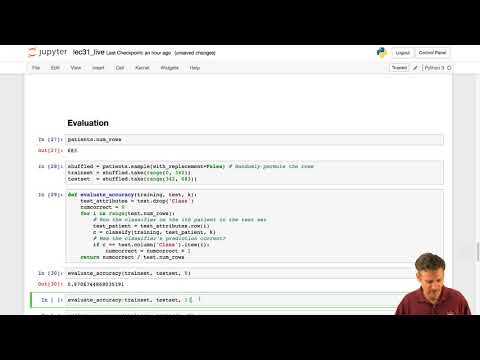

In [6]:
from IPython.display import YouTubeVideo

YouTubeVideo('_Y3-ZItTs3M', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
patients.num_rows

In [ ]:
shuffled = patients.sample(with_replacement=False) # Randomly permute the rows
training_set = shuffled.take(np.arange(342))
test_set  = shuffled.take(np.arange(342, 683))

In [ ]:
def evaluate_accuracy(training, test, k):
    test_attributes = test.drop('Class')
    num_correct = 0
    for i in np.arange(test.num_rows):
        # Run the classifier on the ith patient in the test set
        test_patient = test_attributes.row(i)
        c = classify(training, test_patient, k)
        # Was the classifier's prediction correct?
        if c == test.column('Class').item(i):
            num_correct = num_correct + 1
    return num_correct / test.num_rows

In [ ]:
evaluate_accuracy(training_set, test_set, 5)

In [ ]:
evaluate_accuracy(training_set, test_set, 1)

In [ ]:
evaluate_accuracy(training_set, training_set, 1)

## Decision Boundaries

#### Watch Demo Video Below

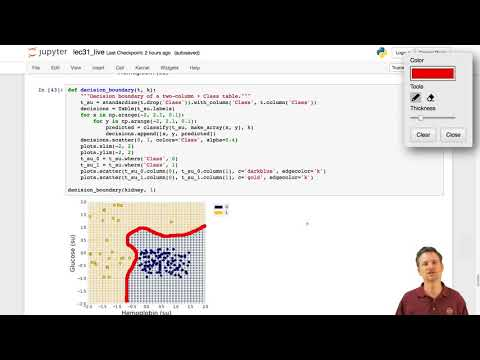

In [5]:
from IPython.display import YouTubeVideo

YouTubeVideo('ctSif908tFI', width=800, height=300)

**Please run all cells before this cell, including the previous example cells and the import cell at the top of the notebook.**

In [ ]:
ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

In [ ]:
kidney = ckd.select('Hemoglobin', 'Glucose', 'Class')
kidney.scatter('Hemoglobin', 'Glucose', colors=2)
plots.scatter(13, 250, color='red', s=30);

In [ ]:
def show_closest(t, point):
    """Show closest training example to a point."""
    near = closest(t, point, 1).row(0)
    t.scatter(0, 1, colors='Class')
    plots.scatter(point.item(0), point.item(1), color='red', s=30)
    plots.plot([point.item(0), near.item(0)], [point.item(1), near.item(1)], color='k', lw=2)
    
show_closest(kidney, make_array(13, 250))

In [ ]:
def standard_units(any_numbers):
    """Convert any array of numbers to standard units."""
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)

def standardize(t):
    """Return a table in which all columns of t are converted to standard units."""
    t_su = Table()
    for label in t.labels:
        t_su = t_su.with_column(label + ' (su)', standard_units(t.column(label)))
    return t_su

In [ ]:
kidney_su = standardize(kidney.drop('Class')).with_column('Class', kidney.column('Class'))
show_closest(kidney_su, make_array(-0.2, 1.8))

In [ ]:
show_closest(kidney_su, make_array(-0.2, 1.3))

In [ ]:
show_closest(kidney_su, make_array(-0.2, 1))

In [ ]:
show_closest(kidney_su, make_array(-0.2, 0.9))

In [ ]:
def decision_boundary(t, k):
    """Decision boundary of a two-column + Class table."""
    t_su = standardize(t.drop('Class')).with_column('Class', t.column('Class'))
    decisions = Table(t_su.labels)
    for x in np.arange(-2, 2.1, 0.1):
        for y in np.arange(-2, 2.1, 0.1):
            predicted = classify(t_su, make_array(x, y), k)
            decisions.append([x, y, predicted])
    decisions.scatter(0, 1, colors='Class', alpha=0.4)
    plots.xlim(-2, 2)
    plots.ylim(-2, 2)
    t_su_0 = t_su.where('Class', 0)
    t_su_1 = t_su.where('Class', 1)
    plots.scatter(t_su_0.column(0), t_su_0.column(1), c='darkblue', edgecolor='k')
    plots.scatter(t_su_1.column(0), t_su_1.column(1), c='gold', edgecolor='k')
    
decision_boundary(kidney, 1)

In [ ]:
decision_boundary(kidney, 5)

In [ ]:
decision_boundary(jittered, 1)

In [ ]:
decision_boundary(jittered, 5)